In [30]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt #
import seaborn as sns
import sklearn as sklearn
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [52]:
# wczytanie danych
df_08_23 = pd.read_csv('apartments_pl_2023_08.csv')
df_09_23 = pd.read_csv('apartments_pl_2023_09.csv')
df_10_23 = pd.read_csv('apartments_pl_2023_10.csv')
df_11_23 = pd.read_csv('apartments_pl_2023_11.csv')
df_12_23 = pd.read_csv('apartments_pl_2023_12.csv')
df_01_24 = pd.read_csv('apartments_pl_2024_01.csv')
df_02_24 = pd.read_csv('apartments_pl_2024_02.csv')
df_03_24 = pd.read_csv('apartments_pl_2024_03.csv')

print(df_08_23.shape)
print(df_09_23.shape)
print(df_10_23.shape)
print(df_11_23.shape)
print(df_12_23.shape)
print(df_01_24.shape)
print(df_02_24.shape)
print(df_03_24.shape)

(18905, 28)
(16997, 28)
(16690, 28)
(16302, 28)
(16483, 28)
(15521, 28)
(16361, 28)
(17318, 28)


In [53]:
# złączenie danych w jeden data frame
frames = [df_08_23, df_09_23, df_10_23, df_11_23, df_12_23, df_01_24, df_02_24, df_03_24]
df = pd.concat(frames)

In [54]:
print(df.shape)
print(df.columns)

(134577, 28)
Index(['id', 'city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')


In [55]:
#ilosc brakujacych danych
df.isna().sum()
# df.info()

id                           0
city                         0
type                     29743
squareMeters                 0
rooms                        0
floor                    24262
floorCount                1761
buildYear                22563
latitude                     0
longitude                    0
centreDistance               0
poiCount                     0
schoolDistance             139
clinicDistance             548
postOfficeDistance         189
kindergartenDistance       157
restaurantDistance         366
collegeDistance           3825
pharmacyDistance           206
ownership                    0
buildingMaterial         52523
condition               101402
hasParkingSpace              0
hasBalcony                   0
hasElevator               6823
hasSecurity                  0
hasStorageRoom               0
price                        0
dtype: int64

In [56]:
# formula czyszczaca dataset z brakujacych danych
df.drop(['id','type', 'floor', 'buildYear', 'condition', 'buildingMaterial'], axis=1, inplace=True)
df_clean = df.dropna()
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [57]:
df_clean.isna().sum()
# df_clean.info()

city                    0
squareMeters            0
rooms                   0
floorCount              0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64

In [58]:
df_clean.describe()

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,66443.000000,6.644300e+04
mean,57.114249,2.626432,5.487967,51.975536,19.555433,4.416842,19.964090,0.390295,0.944420,0.489531,0.336887,0.323454,1.487795,0.334055,7.555741e+05
std,20.470559,0.890118,3.368798,1.307263,1.751306,2.765013,22.605896,0.381339,0.840503,0.410129,0.349058,0.369218,1.112050,0.364922,3.876505e+05
min,25.000000,1.000000,1.000000,49.982200,14.462282,0.020000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.006000,0.001000,1.512000e+05
25%,43.000000,2.000000,3.000000,51.104316,18.549664,2.190000,7.000000,0.176000,0.359000,0.238000,0.152000,0.116000,0.604500,0.144000,5.090000e+05
50%,53.200000,3.000000,4.000000,52.193514,19.931398,4.080000,14.000000,0.289000,0.678000,0.391000,0.255000,0.230000,1.168000,0.238000,6.781550e+05
75%,66.000000,3.000000,7.000000,52.345151,20.995875,6.120000,24.000000,0.462000,1.217000,0.607000,0.405000,0.402000,2.123000,0.398000,8.900000e+05
max,150.000000,6.000000,29.000000,54.571600,23.207128,16.940000,212.000000,4.472000,4.998000,4.585000,4.680000,4.269000,5.000000,4.242000,3.250000e+06


In [59]:
df_clean.corr(numeric_only=True)

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
squareMeters,1.000000,0.824401,-0.139539,0.030308,-0.007323,0.059803,0.026107,0.062341,0.008574,0.051655,0.054895,0.019873,0.046612,0.052066,0.652587
rooms,0.824401,1.000000,-0.078130,0.026273,0.004443,0.058656,-0.010032,0.061876,0.033065,0.053616,0.050644,0.046086,0.053415,0.060375,0.502041
floorCount,-0.139539,-0.078130,1.000000,0.014618,0.110814,-0.034782,0.047419,-0.139608,-0.172411,-0.100722,-0.124614,-0.126981,-0.097992,-0.136565,0.011011
latitude,0.030308,0.026273,0.014618,1.000000,-0.180756,0.066802,-0.026695,0.134209,0.086670,0.088096,0.170977,0.132259,0.114502,0.129293,0.012159
longitude,-0.007323,0.004443,0.110814,-0.180756,1.000000,0.221206,0.034075,-0.095231,-0.081556,-0.037253,-0.133509,-0.110654,-0.006029,-0.047047,0.217654
centreDistance,0.059803,0.058656,-0.034782,0.066802,0.221206,1.000000,-0.438015,0.267900,0.392034,0.223841,0.080429,0.206762,0.530155,0.230150,0.102645
poiCount,0.026107,-0.010032,0.047419,-0.026695,0.034075,-0.438015,1.000000,-0.322044,-0.363641,-0.337684,-0.208505,-0.374385,-0.441706,-0.321001,0.174984
schoolDistance,0.062341,0.061876,-0.139608,0.134209,-0.095231,0.267900,-0.322044,1.000000,0.525447,0.652951,0.680827,0.660416,0.427891,0.702807,0.005015
clinicDistance,0.008574,0.033065,-0.172411,0.086670,-0.081556,0.392034,-0.363641,0.525447,1.000000,0.438968,0.384435,0.486450,0.491549,0.472030,-0.118835
postOfficeDistance,0.051655,0.053616,-0.100722,0.088096,-0.037253,0.223841,-0.337684,0.652951,0.438968,1.000000,0.616123,0.679222,0.322296,0.718226,-0.012432


<Axes: >

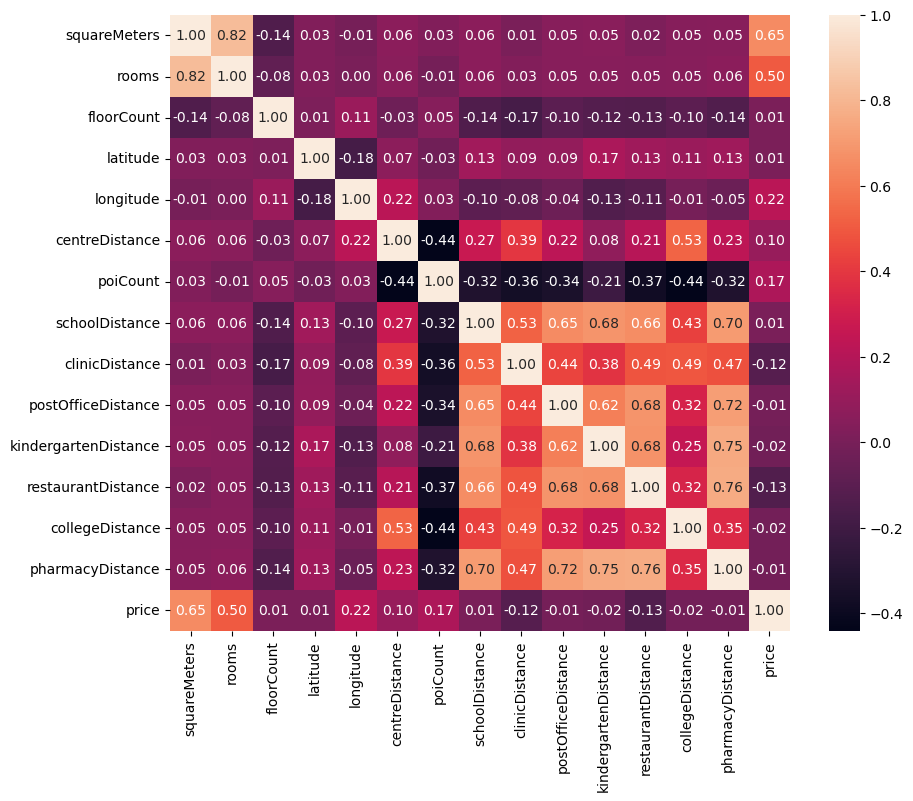

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt = '.2f')

In [61]:
df_encoded = df_clean.copy()
cat_cols = df_encoded.select_dtypes(['object']).columns
df_cats = df_encoded[cat_cols].reset_index(drop=True)

df_encoded[df_cats.columns] = df_encoded[df_cats.columns].apply(LabelEncoder().fit_transform)
df_encoded.head()

,city,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,12,36.00,2.0,10.0,53.442692,14.559690,2.15,16.0,0.273,0.492,...,0.348,1.404,0.205,1,0,1,1,0,1,395995
1,12,73.02,3.0,3.0,53.452222,14.553333,3.24,9.0,0.275,0.672,...,0.300,1.857,0.280,0,0,0,0,0,0,565000
2,12,87.60,3.0,3.0,53.435100,14.532900,2.27,32.0,0.175,0.259,...,0.101,0.310,0.087,0,1,1,0,0,1,640000
3,12,66.00,3.0,3.0,53.410278,14.503611,4.07,1.0,0.218,1.690,...,0.501,2.138,0.514,0,0,0,0,0,0,759000
4,12,63.30,3.0,4.0,53.463100,14.572800,4.48,10.0,0.079,1.224,...,1.102,0.377,0.745,1,1,1,0,0,1,499000


<Axes: >

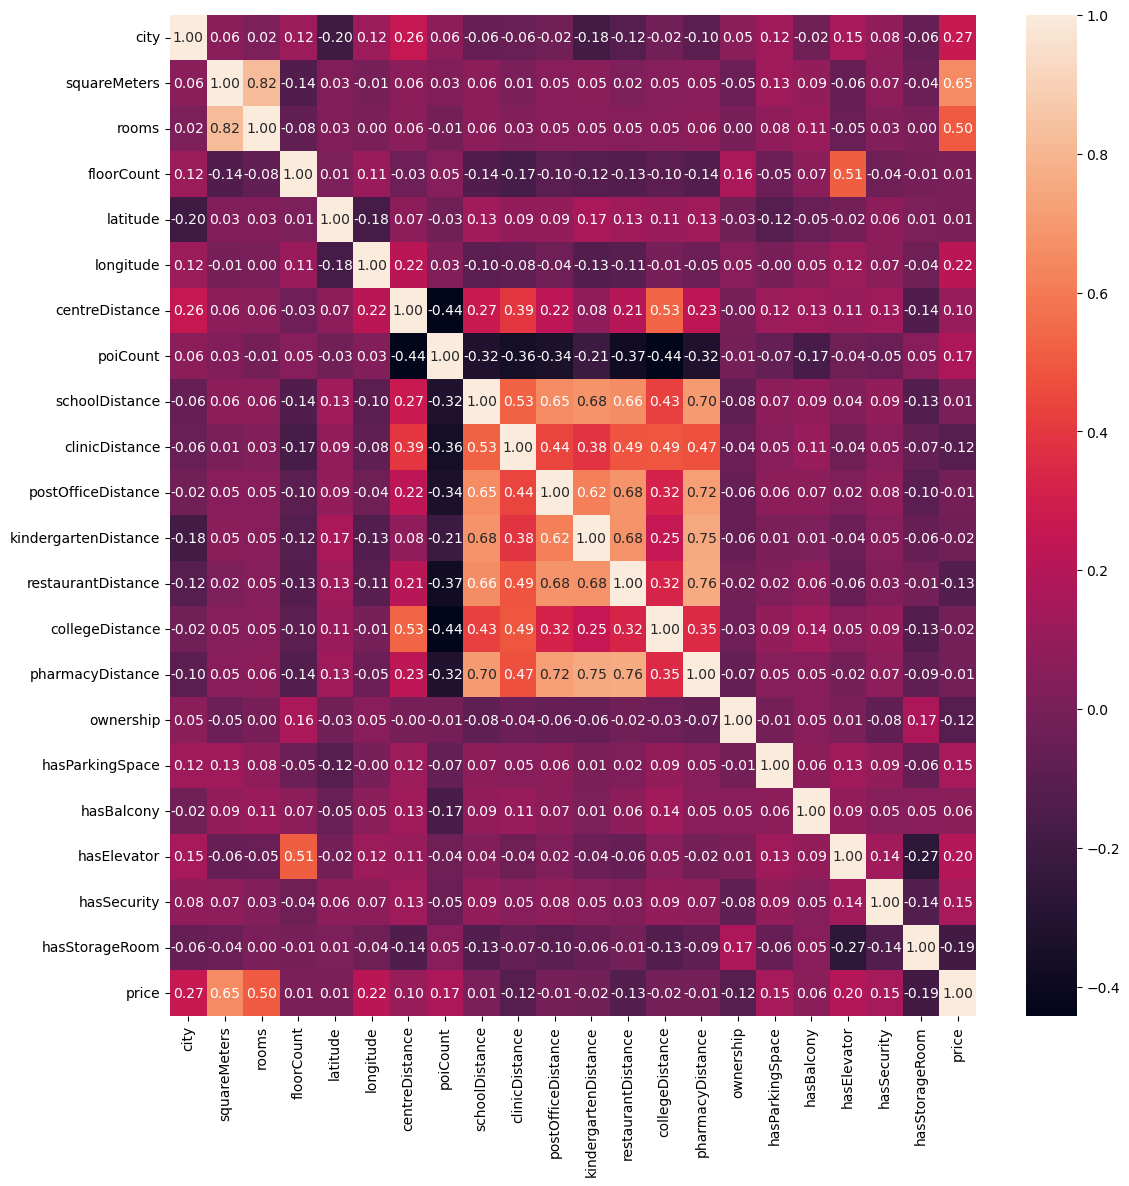

In [62]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_encoded.corr(), annot=True, fmt = '.2f')